In [1]:
import pandas as pd    
import numpy as np
import nltk
import string
from sklearn import model_selection 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [2]:
# text preproprocessing

fileexcel = "data_cacat.xlsx"
teks = pd.read_excel(fileexcel)
df = pd.DataFrame(teks)
print(df)

         Produk Berat Produk Bentuk Produk Pengukuran  Ukuran Cacat Posisi  \
0      Produk 1        kecil         besar         ada        besar   luar   
1      Produk 2       sedang         besar         ada        kecil  luar    
2     Produk 3         kecil        besar          ada        besar  dalam   
3      Produk 4       sedang         besar         ada        kecil  dalam   
4      Produk 5        besar         besar         ada    tidak ada   luar   
..          ...          ...           ...         ...          ...    ...   
495  Produk 496        besar         kecil         ada    tidak ada  dalam   
496  Produk 497        kecil         kecil         ada    tidak ada  dalam   
497  Produk 498       sedang         kecil   tidak ada        besar  dalam   
498  Produk 499        kecil         kecil   tidak ada        kecil  dalam   
499  Produk 500       sedang         kecil   tidak ada        besar  dalam   

       Area Hasil  
0      Lock   NOK  
1      lock   NOK  
2  

In [3]:
xTarget = df.drop(['Produk','Hasil'],axis = 1)
print(xTarget)

yTarget = df['Hasil']
print(yTarget)

    Berat Produk Bentuk Produk Pengukuran  Ukuran Cacat Posisi    Area
0          kecil         besar         ada        besar   luar    Lock
1         sedang         besar         ada        kecil  luar     lock
2          kecil        besar          ada        besar  dalam    Lock
3         sedang         besar         ada        kecil  dalam   Lock 
4          besar         besar         ada    tidak ada   luar   Lock 
..           ...           ...         ...          ...    ...     ...
495        besar         kecil         ada    tidak ada  dalam    Lock
496        kecil         kecil         ada    tidak ada  dalam  NoLock
497       sedang         kecil   tidak ada        besar  dalam    Lock
498        kecil         kecil   tidak ada        kecil  dalam    Lock
499       sedang         kecil   tidak ada        besar  dalam    Lock

[500 rows x 6 columns]
0      NOK
1      NOK
2      NOK
3      NOK
4       OK
      ... 
495     OK
496     OK
497    NOK
498    NOK
499     OK
Nam

In [4]:
# #merubah yes / no menjadi angka 0 dan 1
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder
encoder = LabelBinarizer()
Y = encoder.fit_transform(yTarget)
print(Y)

# #mengkodekan semua value menjadi ordinal
tfidf_transformer = OneHotEncoder()
X = tfidf_transformer.fit_transform(xTarget)
print(X)


[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(350, 32)
(350, 1)
(150, 32)
(150, 1)


In [6]:
NaiveBayes 	= MultinomialNB().fit(X_train,np.ravel(y_train,order='C'))
Knn       	= KNeighborsClassifier(n_neighbors = 3).fit(X_train,np.ravel(y_train,order='C'))
RandomForest = RandomForestClassifier(n_estimators=50, max_depth=3).fit(X_train,np.ravel(y_train,order='C'))
DTree 	=    DecisionTreeClassifier().fit(X_train,np.ravel(y_train,order='C'))
MultiLP =   MLPClassifier(max_iter= 100).fit(X_train,np.ravel(y_train,order='C'))
SuppVM 	=  SVC(gamma='scale', decision_function_shape='ovo', kernel = 'linear').fit(X_train,np.ravel(y_train,order='C'))

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
models = [
    NaiveBayes,
    Knn,      
    RandomForest, 
    DTree, 
    MultiLP, 
    SuppVM, 
] 
dlist = [
    'NB',
    'K-NN',      
    'RF', 
    'DT', 
    'MLP', 
    'SVM', 
]


In [8]:
i = 0
print(y_test.shape)
entries = []
for model in models:
    prediction = model.predict(X_test)
    accuracies = accuracy_score(y_test, prediction)
    nameS = dlist[i]
    entries.append((nameS, model, accuracies))
    i = i + 1

(150, 1)


In [9]:
cv_df = pd.DataFrame(entries, columns=['Classifier','prediction','accuracy'])
cv_df.to_csv('akurasiDataCacat.csv')
print(cv_df)


  Classifier                                         prediction  accuracy
0         NB                                    MultinomialNB()  0.820000
1       K-NN                KNeighborsClassifier(n_neighbors=3)  0.893333
2         RF  (DecisionTreeClassifier(max_depth=3, max_featu...  0.820000
3         DT                           DecisionTreeClassifier()  0.920000
4        MLP                        MLPClassifier(max_iter=100)  0.913333
5        SVM  SVC(decision_function_shape='ovo', kernel='lin...  0.880000


In [10]:
print(confusion_matrix(y_test, prediction))

[[83  4]
 [14 49]]


accuracy
0.820000    0.820000
0.880000    0.880000
0.893333    0.893333
0.913333    0.913333
0.920000    0.920000
Name: accuracy, dtype: float64


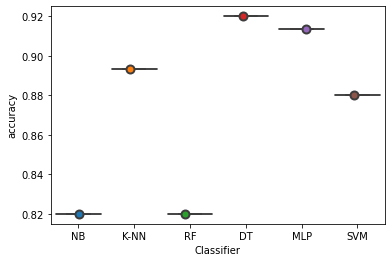

In [11]:
sns.boxplot(x='Classifier', y='accuracy', data=cv_df)
sns.stripplot(x='Classifier', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

print(cv_df.groupby('accuracy').accuracy.mean())

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[83  4]
 [14 49]]
Normalized confusion matrix
[[0.95 0.05]
 [0.22 0.78]]


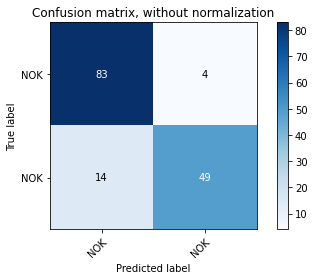

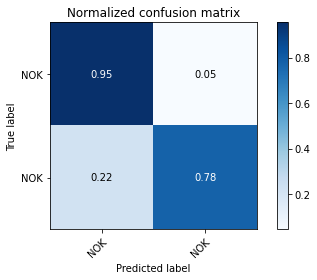

In [12]:
class_names = yTarget
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()
